In [23]:
import numpy as np
import fonction_polarisation as fp
import sys as sys
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.integrate import simps
from IPython.display import Math
%matplotlib widget

In [24]:
angle_pol_pre = 3*np.pi/4 #angle de l'état préparé
ellips = np.pi/4 #avec une ellipticité

vect_jones_pre = fp.j_theta_epsilon(angle_pol_pre, ellips) #le vecteur de jones de notre état
vect_jones_1 = [1/np.sqrt(2), 1j/np.sqrt(2)]

scalar = np.dot(vect_jones_pre, vect_jones_1)
print(np.real(scalar))

print(vect_jones_pre)

psi, delta = fp.psidelta_j(vect_jones_pre)
print(psi, delta)
phi_x = 0
phi_y = delta

0.9999999999999998
[(0.7071067811865475+5.551115123125783e-17j), (-5.551115123125783e-17-0.7071067811865475j)]
1.5707963267948966 -1.5707963267948968


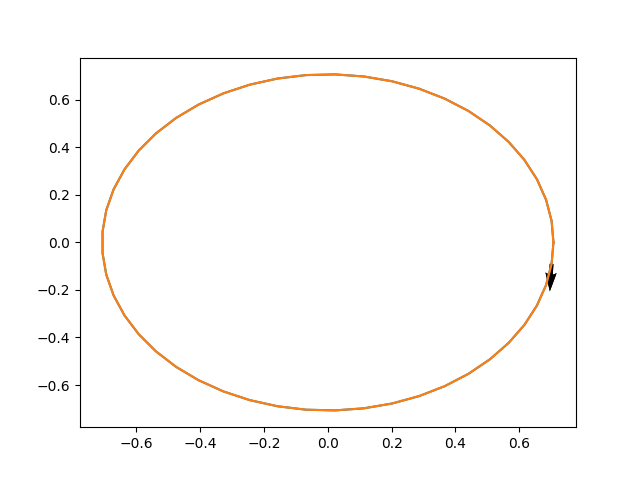

In [25]:
plt.figure(1)
fp.graph_j(vect_jones_pre) #démontre la polarisation

In [26]:
'''
theta -> angle de l'état de polarisation préparé
theta_prime -> angle de l'état de polarisation postselectioné
phi_x -> phase en x de l'état de polarisation préparé
phi_y -> phase en y ...
phi_prime -> phase de l'état de polarisation postselectioné
delta -> décalage en x
sigma -> largeur du faisceau
'''
#ne depend pas du pointeur
def valeur_faible_re(theta, theta_prime, phi_x, phi_y, phi_prime, delta, sigma):
    
    #verify ***********************************
    A_re = np.real((delta/2)*(np.exp((-1j)*(phi_prime - phi_x + phi_y))*np.sin(theta)*np.sin(theta_prime) + np.exp((-1j)*(-phi_prime + phi_x - phi_y))*np.sin(theta)*np.sin(theta_prime) +2*np.cos(theta)*np.cos(theta_prime))*np.cos(theta)*np.cos(theta_prime))
    return A_re

'''
theta -> angle de l'état de polarisation préparé
theta_prime -> angle de l'état de polarisation postselectioné
phi_x -> phase en x de l'état de polarisation préparé
phi_y -> phase en y ...
phi_prime -> phase de l'état de polarisation postselectioné
delta -> décalage en x
sigma -> largeur du faisceau
'''
def valeur_faible_im(theta, theta_prime, phi_x, phi_y, phi_prime, delta, sigma):
    A_im = np.imag(((delta*(1j))/(64*np.pi*sigma**2))*(-np.exp(2*1j*phi_x) + np.exp(2*1j*(phi_prime+phi_y)))*(np.cos(2*theta - 2*theta_prime) - np.cos(2*theta + 2*theta_prime))*(np.exp(-1j*phi_prime-1j*phi_x-1j*phi_y)))
    return A_im

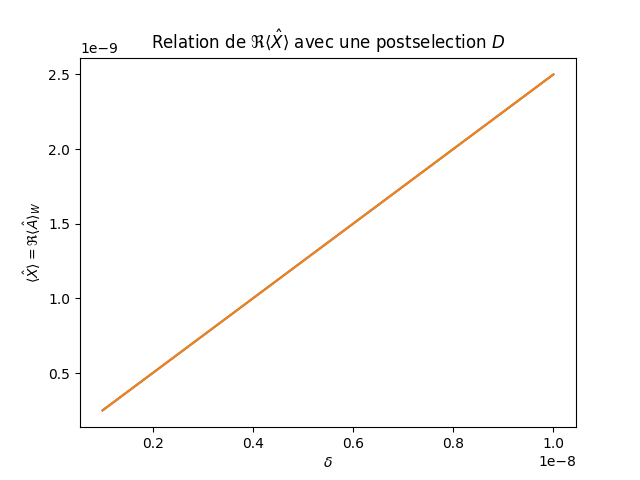

In [27]:
N = 200 #nombre de points

#L'écart d'un laser pulsé: dans le dégrée temporelle
wavelength = 640e-9 #nm 
largeur = 10e-9 #largeur du faiceau (laser nanoseconde)

#Décalage
MIN = largeur/10 #basé sur 1/1000 de largeur du laser nanoseconde
MAX = largeur #basé sur un séparation de 2 fois un nanoseconde

decal = np.linspace(MIN, MAX, N)

#postselection diagonale
angle_pol_post = np.pi/4
phi_x_post = 0
phi_y_post = 0

#graphe réel
plt.figure(2)
plt.plot(decal, np.real(valeur_faible_re(angle_pol_pre, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Re{\langle \hat{X} \rangle}$ avec une postselection $D$')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

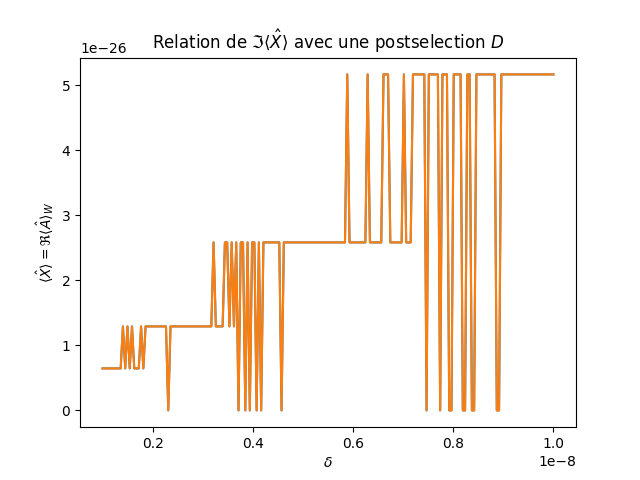

In [28]:
#graphe partie imaginaire
plt.figure(3)
plt.plot(decal, np.real(valeur_faible_im(angle_pol_pre, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Im{\langle \hat{X} \rangle}$ avec une postselection $D$')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

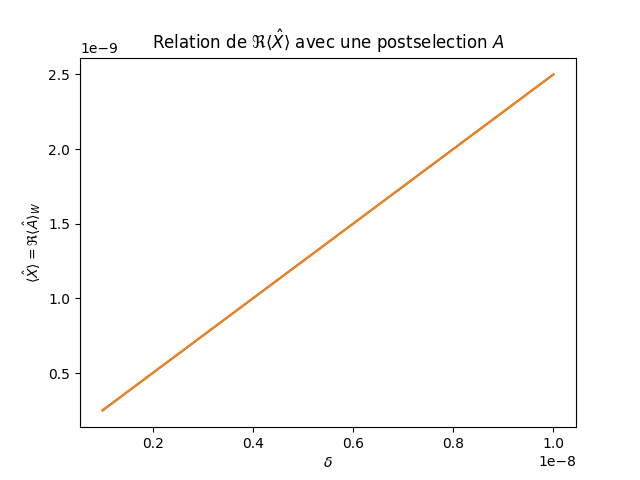

In [29]:
#postselection antidiagonale
angle_pol_post = -np.pi/4
phi_x_post = 0
phi_y_post = 0

#graphe réel
plt.figure(4)
plt.plot(decal, np.real(valeur_faible_re(angle_pol_pre, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Re{\langle \hat{X} \rangle}$ avec une postselection $A$')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

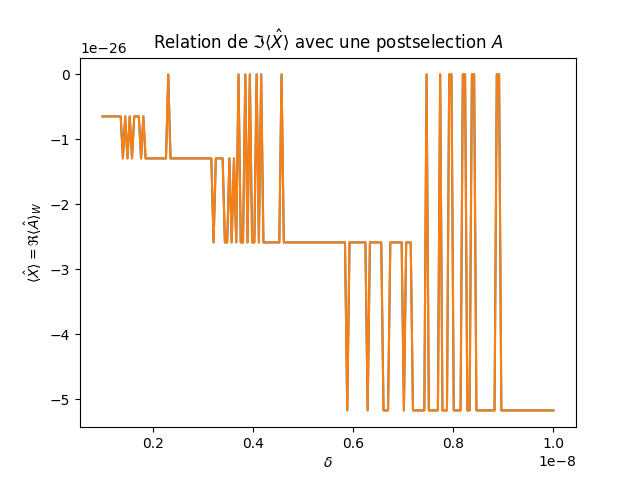

In [30]:
#graphe partie imaginaire
plt.figure(5)
plt.plot(decal, np.real(valeur_faible_im(angle_pol_pre, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Im{\langle \hat{X} \rangle}$ avec une postselection $A$')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

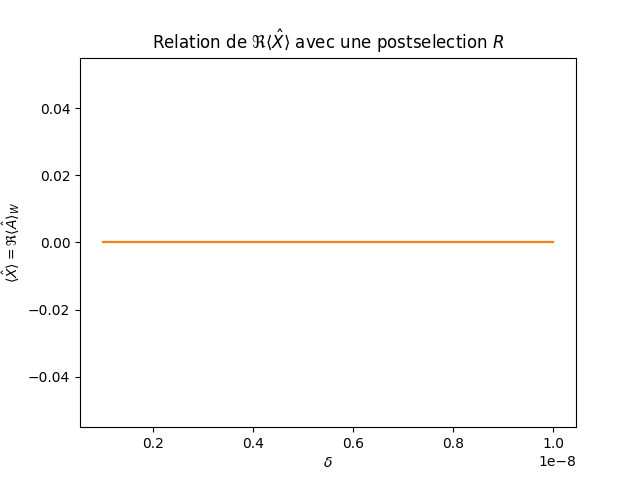

In [31]:
#postselection antidiagonale
angle_pol_post = np.pi/4
phi_x_post = 0
phi_y_post = np.pi/2

#graphe réel
plt.figure(6)
plt.plot(decal, np.real(valeur_faible_re(angle_pol_pre, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Re{\langle \hat{X} \rangle}$ avec une postselection $R$')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

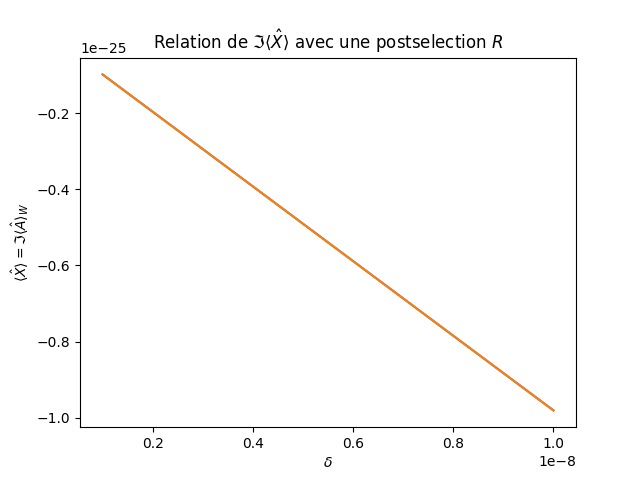

In [32]:
#graphe partie imaginaire
plt.figure(7)
plt.plot(decal, np.real(valeur_faible_im(angle_pol_pre, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Im{\langle \hat{X} \rangle}$ avec une postselection $R$')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Im{\langle \hat{A} \rangle}_{W}$')
plt.show()

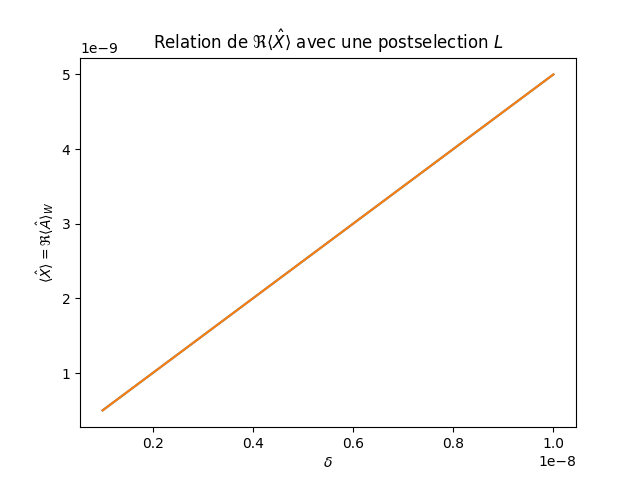

In [33]:
#postselection antidiagonale
angle_pol_post = np.pi/4
phi_x_post = 0
phi_y_post = -np.pi/2

#graphe réel
plt.figure(8)
plt.plot(decal, np.real(valeur_faible_re(angle_pol_pre, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Re{\langle \hat{X} \rangle}$ avec une postselection $L$')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

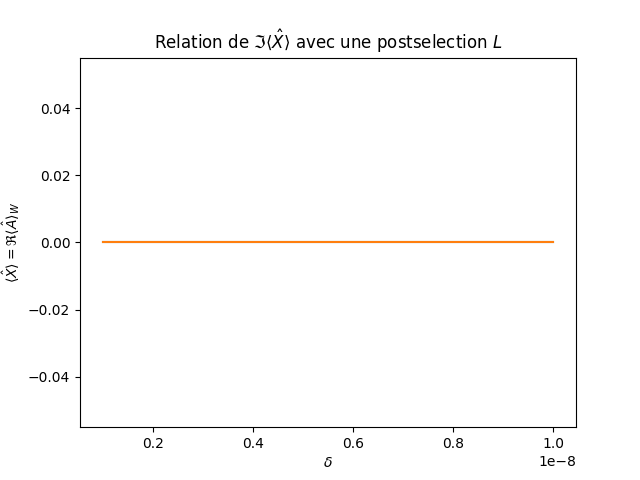

In [34]:
#graphe partie imaginaire
plt.figure(9)
plt.plot(decal, np.imag(valeur_faible_im(angle_pol_pre, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Im{\langle \hat{X} \rangle}$ avec une postselection $L$')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

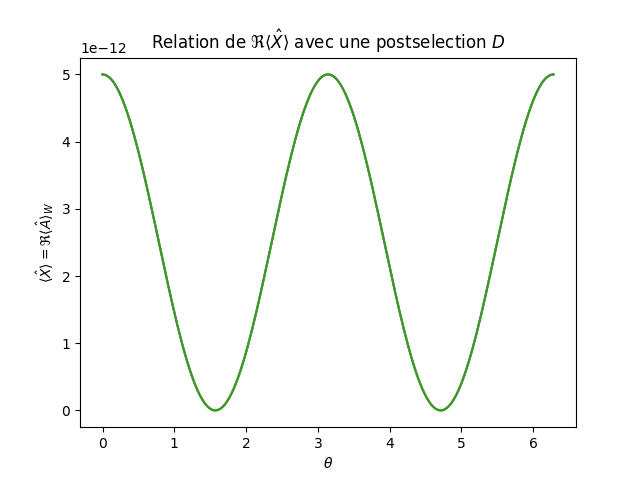

In [35]:
#angle de polarisation préparé
MIN = 0
MAX = 2*np.pi
angle = np.linspace(MIN, MAX, N)

#décalage
decal = largeur/1000

#postselection diagonale
angle_pol_post = np.pi/4
phi_x_post = 0
phi_y_post = 0

#graphe réel
plt.figure(10)
plt.plot(angle, np.real(valeur_faible_re(angle, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Re{\langle \hat{X} \rangle}$ avec une postselection $D$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

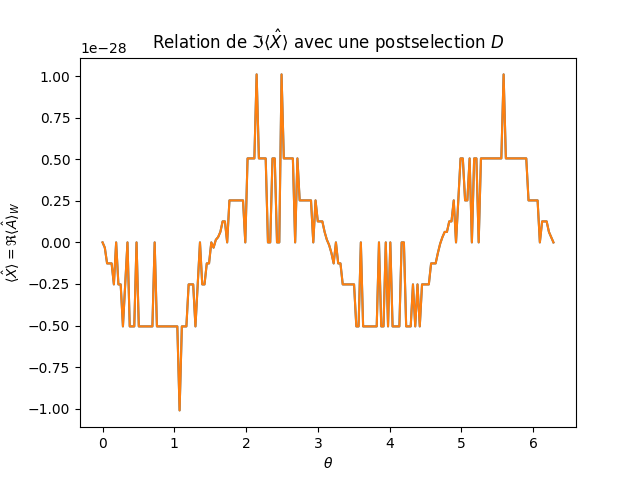

In [36]:
#graphe partie imaginaire
plt.figure(11)
plt.plot(angle, np.real(valeur_faible_im(angle, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Im{\langle \hat{X} \rangle}$ avec une postselection $D$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

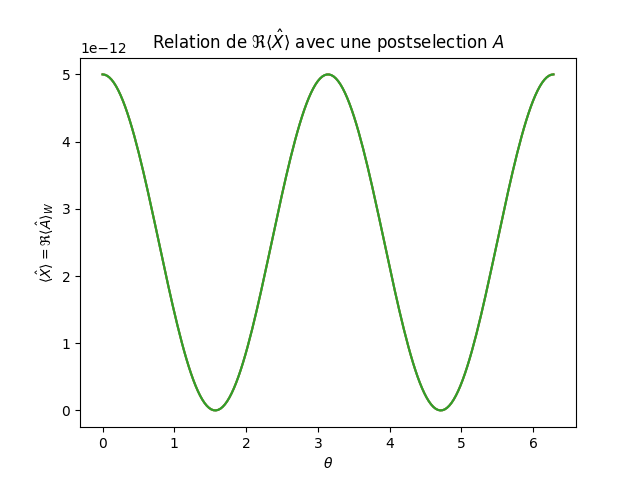

In [37]:
#postselection antidiagonale
angle_pol_post = -np.pi/4
phi_x_post = 0
phi_y_post = 0

#graphe réel
plt.figure(12)
plt.plot(angle, np.real(valeur_faible_re(angle, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Re{\langle \hat{X} \rangle}$ avec une postselection $A$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

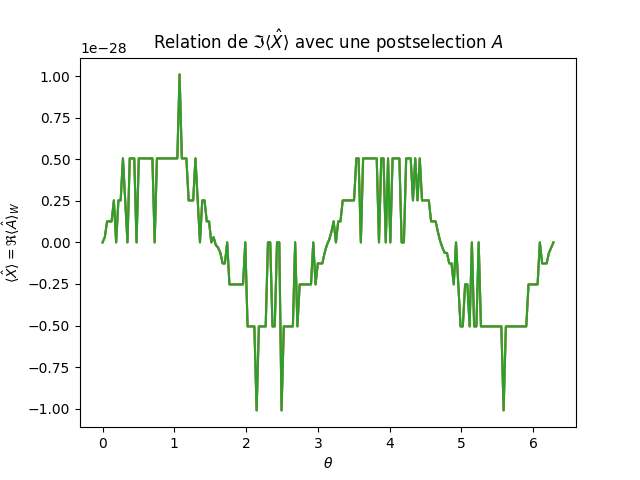

In [38]:
#graphe partie imaginaire
plt.figure(13)
plt.plot(angle, np.real(valeur_faible_im(angle, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Im{\langle \hat{X} \rangle}$ avec une postselection $A$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

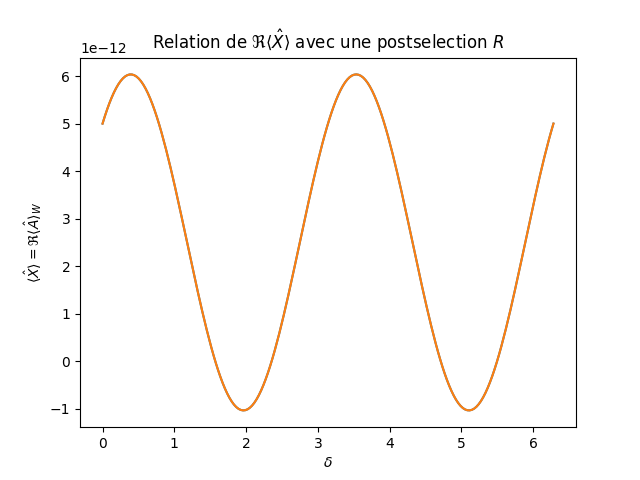

In [39]:
#postselection antidiagonale
angle_pol_post = np.pi/4
phi_x_post = 0
phi_y_post = np.pi/2

#graphe réel
plt.figure(14)
plt.plot(angle, np.real(valeur_faible_re(angle, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Re{\langle \hat{X} \rangle}$ avec une postselection $R$')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

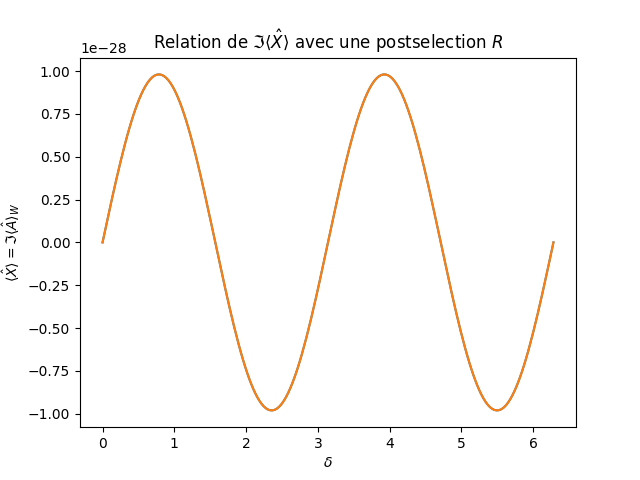

In [40]:
#graphe partie imaginaire
plt.figure(15)
plt.plot(angle, np.real(valeur_faible_im(angle, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Im{\langle \hat{X} \rangle}$ avec une postselection $R$')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Im{\langle \hat{A} \rangle}_{W}$')
plt.show()

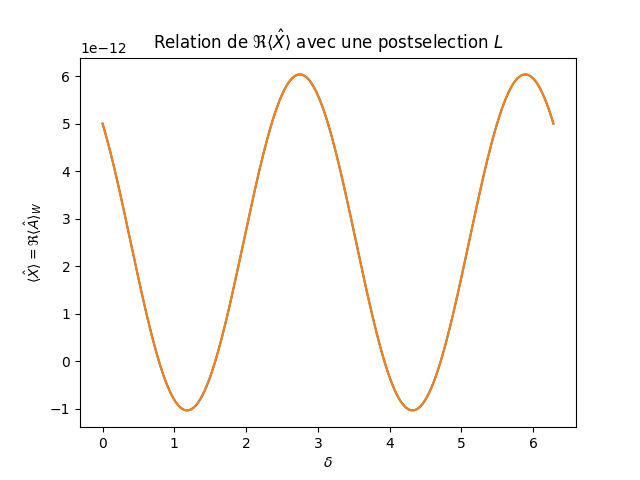

In [41]:
#postselection antidiagonale
angle_pol_post = np.pi/4
phi_x_post = 0
phi_y_post = -np.pi/2

#graphe réel
plt.figure(16)
plt.plot(angle, np.real(valeur_faible_re(angle, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Re{\langle \hat{X} \rangle}$ avec une postselection $L$')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()

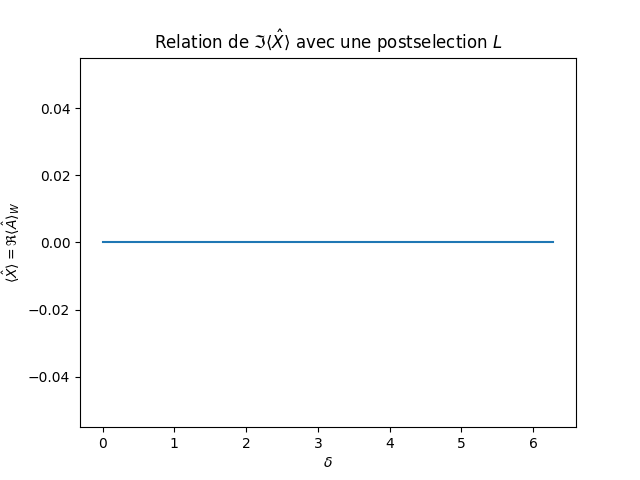

In [42]:
#graphe partie imaginaire
plt.figure(17)
plt.plot(angle, np.imag(valeur_faible_im(angle, angle_pol_post, phi_x, phi_y, phi_y_post, decal, largeur)))
plt.title(r'Relation de $\Im{\langle \hat{X} \rangle}$ avec une postselection $L$')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle \hat{X} \rangle = \Re{\langle \hat{A} \rangle}_{W}$')
plt.show()